# Image Classification(CIFAR10 Dataset)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras import models, layers

 # Data

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Rehape image classes(y_train) data

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[3]

4

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plt_img(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

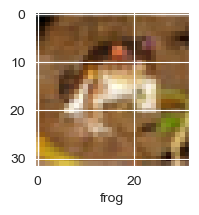

In [9]:
plt_img(X_train, y_train, 0)

## Scale the image pixel data
Normalise the pixel values from 0 to 1

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Model Creation

# Artificial Neural Network(ANN)
We will first use an ANN to evaluate its accuracy

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    # Output Layer: 10 classes
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

2023-03-21 13:53:18.365894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-21 13:53:18.365922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


2023-03-21 13:53:19.687371: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5
   1/1563 [..............................] - ETA: 12:37 - loss: 2.4148 - accuracy: 0.1250

2023-03-21 13:53:20.039664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 9ms/step - loss: 1.8811 - accuracy: 0.3280
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6731 - accuracy: 0.4014
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5897 - accuracy: 0.4312
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5414 - accuracy: 0.4469
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5018 - accuracy: 0.4624


In [13]:
ann.evaluate(X_test,y_test)

 23/313 [=>............................] - ETA: 1s - loss: 1.4796 - accuracy: 0.4470

2023-03-21 13:54:31.204033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 1.4967 - accuracy: 0.4651


[1.4966908693313599, 0.4651000201702118]

ANN is performing with low accuracy: 0.45

## Classification Report

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

2023-03-21 13:54:32.908019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.49      0.51      1000
           1       0.61      0.54      0.58      1000
           2       0.36      0.38      0.37      1000
           3       0.31      0.41      0.35      1000
           4       0.46      0.32      0.38      1000
           5       0.39      0.36      0.38      1000
           6       0.49      0.42      0.45      1000
           7       0.58      0.48      0.52      1000
           8       0.51      0.67      0.58      1000
           9       0.48      0.59      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



## Convolutional Neural Network

Since a CNN is made up of: Convolution+Relu and Pooling Layers then a Dense Layer. We will keep the dense layer above and work on the Convolution+Relu and Pooling aspects

<img src="Images/cnn.png"></img>

In [15]:
cnn = models.Sequential([
    # CNN
    # kernel_size: size of filter
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense Layers
    layers.Flatten(), # CNN will figure out the input shape
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 classes
    # Softmax: classes probability output will sum to 1
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-03-21 13:55:37.068311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 7ms/step - loss: 1.4822 - accuracy: 0.4673
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1045 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9629 - accuracy: 0.6670
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8788 - accuracy: 0.6963
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8052 - accuracy: 0.7203
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7473 - accuracy: 0.7405
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6990 - accuracy: 0.7550
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6598 - accuracy: 0.7688
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6170 - accuracy: 0.7823
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5835

In [21]:
cnn.evaluate(X_test, y_test)

 21/313 [=>............................] - ETA: 1s - loss: 0.8440 - accuracy: 0.7202

2023-03-21 13:57:25.489842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.9190 - accuracy: 0.7082


[0.9189518094062805, 0.7082000374794006]

CNN achieved a greater accuracy compared to ANN: 0.70 vs 0.45

# Predictions

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.01609148e-04, 1.21055949e-04, 3.26906377e-03, 8.76022577e-01,
        5.81560191e-04, 9.39838067e-02, 3.31541151e-03, 8.10546117e-05,
        2.24160943e-02, 1.07846776e-04],
       [2.86714174e-04, 1.13482783e-02, 2.44734395e-07, 1.42733114e-07,
        3.07214982e-08, 1.93155617e-10, 3.26213723e-09, 2.28876279e-10,
        9.88361776e-01, 2.95117570e-06],
       [8.10630023e-02, 6.39548302e-01, 1.53448433e-04, 1.76313240e-03,
        3.14761186e-04, 9.11894967e-05, 1.65814417e-05, 2.43643677e-04,
        2.72644073e-01, 4.16193297e-03],
       [6.52350068e-01, 6.07534265e-03, 3.36097814e-02, 4.45388481e-02,
        1.68992616e-02, 1.69836858e-04, 7.16199051e-04, 1.17884911e-05,
        2.45324671e-01, 3.04212736e-04],
       [9.20946059e-06, 1.35392811e-05, 4.99136979e-03, 7.40618771e-03,
        7.54399180e-01, 2.52613588e-03, 2.30609894e-01, 3.70965536e-05,
        2.62611547e-06, 4.69919496e-06]], dtype=float32)

The above is softmax output where the sum of probabilities for a sample is 1. We will convert so the largest probability is 1, by using the argmax function

In [27]:
np.argmax([2,50,4])

1

argmax will return the index position of the largest value

In [28]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 1, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

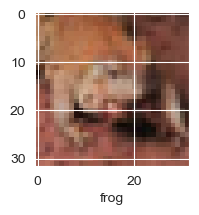

In [40]:
y_test = y_test.reshape(-1,)
plt_img(X_test, y_test, 5)

In [41]:
classes[y_pred_classes[5]]

'frog'

## Classification Report

In [42]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.73      1000
           1       0.85      0.81      0.83      1000
           2       0.62      0.57      0.59      1000
           3       0.59      0.43      0.50      1000
           4       0.67      0.63      0.65      1000
           5       0.57      0.70      0.63      1000
           6       0.80      0.78      0.79      1000
           7       0.68      0.80      0.73      1000
           8       0.80      0.82      0.81      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

